In [1]:
#importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler


In [2]:
beer = pd.read_csv('data/recipeData.csv', index_col='BeerID', encoding='latin1')

In [3]:
beer.shape

(73861, 21)

In [4]:
beer.head()

,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,...,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount
BeerID,,,,,,,,,,,,,,,,,,,,,
1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,...,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz
2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,...,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,...,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN
4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,...,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,...,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l


In [5]:
stylecounts = pd.DataFrame(beer['Style'].value_counts().reset_index())
stylecounts.loc[stylecounts['Style']>400,:]


,index,Style
0,American IPA,11940
1,American Pale Ale,7581
2,Saison,2617
3,American Light Lager,2277
4,American Amber Ale,2038
5,Blonde Ale,1753
6,Imperial IPA,1478
7,American Stout,1268
8,Irish Red Ale,1204
9,American Brown Ale,1152


In [6]:
#a = beer['Imperial IPA'] = (beer['Style'].str.contains('Imperial IPA'or'Double IPA'))*'Imperial IPA '


In [7]:
#b = beer['Black IPA'] = (beer['Style'].str.contains('Black IPA'))*'Black IPA '

In [8]:
v = beer['IPA'] = (beer['Style'].str.contains(' IPA'))*'IPA'


In [9]:
c = beer['Pale Ale'] = (beer['Style'].str.contains('Pale Ale'))*'Pale Ales' 

In [10]:
#d = beer['Light Lager'] = (beer['Style'].str.contains('Light Lager'))*'Light '

In [11]:
#o = beer['Lager'] = (beer['Style'].str.contains(' Lager|Common |Steam '))*'Lager'

In [12]:
#e = beer['Blonde Ale'] = (beer['Style'].str.contains('Blonde Ale' or 'Blond Ale'or 'Cream Ale'))*'Blonde '

In [13]:
f = beer['Pale Ale'] = (beer['Style'].str.contains('Saison|Strong Bitter'))*'Pale Ales'

In [14]:
#g = beer['Oatmeal Stout'] = (beer['Style'].str.contains('Oatmeal Stout'))*'Oatmeal Stout '

In [15]:
#h = beer['Sweet Stout'] = (beer['Style'].str.contains('Sweet Stout' or 'Oatmeal Stout'))*'Sweet Stout '

In [16]:
#j = beer['Saison'] = (beer['Style'].str.contains('Saison'))*'Saison'

In [17]:
#k = beer['Stout'] = (beer['Style'].str.contains(' Stout'))*'Stout' 

In [18]:
#m = beer['Ales'] = (beer['Style'].str.contains(' Ale'))*'Ales'

In [19]:
#l = beer['Brown Ale'] = (beer['Style'].str.contains('Brown Ale' or 'Dark Strong Ale' or 'Dark Ale'))*'Brown '

In [20]:
#n = beer['Ales'] = (beer['Style'].str.contains('Brown Ale|Strong Ale|Dark Ale|Red Ale|Amber Ale|Blonde Ale|Blond Ale|Cream Ale'))*'Ales'

In [21]:
#q = beer['Weissbier'] = (beer['Style'].str.contains('Witbier|Weissbier|Weizenbier|Weizen/Weissbier'))*'Weissbier'

In [22]:
#s = beer['Kölsch'] = (beer['Style'].str.contains('Kölsch'))*'Kölsch'

In [23]:
#t = beer['Porter'] = (beer['Style'].str.contains(' Porter'))*'Porter'

In [24]:
#u = beer['Wheat beer'] = (beer['Style'].str.contains('Wheat Beer'))*'Wheat Beer'

In [25]:
beer['kind'] = v+f+c+''
beer['kind'].value_counts()

             44238
IPA          17064
Pale Ales    11963
Name: kind, dtype: int64

In [26]:
beer2 = pd.DataFrame(beer.iloc[:,:-3])

In [27]:
beer2.head()

,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,...,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount
BeerID,,,,,,,,,,,,,,,,,,,,,
1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,...,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz
2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,...,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,...,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN
4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,...,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,...,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l


In [28]:
beer2['kind'] = beer['kind']

In [29]:
beer2['kind'] =  beer2['kind'].replace('',np.nan)

In [30]:
beer2['kind'].count()

29027

In [31]:
beer2['kind'].value_counts()

IPA          17064
Pale Ales    11963
Name: kind, dtype: int64

In [32]:
## Count nulls 
null_count = beer2.isnull().sum()
null_count[null_count>0]

Name                 1
Style              596
BoilGravity       2990
MashThickness    29864
PitchRate        39252
PrimaryTemp      22662
PrimingMethod    67095
PrimingAmount    69087
kind             44834
dtype: int64

PrimingMethod and PrimingAmount have too many nulls to be useful.

In [33]:
beer2 = beer2.drop(columns = ['PrimingMethod','PrimingAmount','URL','Name'])

I'm replacing the style column with my 'kind' column.

In [34]:
beer2 = beer2.drop(columns = ['Style'])

PitchRate also has an awful lot of nan values. I'll do a histogram to see if the nan values are consistent across all styles.

In [35]:
beer2.PitchRate.describe()

count    34609.000000
mean         0.750468
std          0.394262
min          0.000000
25%          0.350000
50%          0.750000
75%          1.000000
max          2.000000
Name: PitchRate, dtype: float64

In [36]:
beer2['PrimaryTemp'].describe()

count    51199.000000
mean        19.175641
std          4.219676
min        -17.780000
25%         18.000000
50%         20.000000
75%         20.000000
max        114.000000
Name: PrimaryTemp, dtype: float64

In [37]:
beer2['MashThickness'].describe()

count    43997.000000
mean         2.127235
std          1.682347
min          0.000000
25%          1.500000
50%          1.500000
75%          3.000000
max        100.000000
Name: MashThickness, dtype: float64

The counts for MashThickness, PitchRate and PrimaryTemp are fairly high. We can keep these features if they don't seem skewed toward one style or another.

In [38]:
beergroup = pd.DataFrame(beer2.groupby('StyleID')['MashThickness'].count().reset_index())

In [39]:
beergroup2 = pd.DataFrame(beer2.groupby('StyleID')['PrimaryTemp'].count().reset_index())

In [40]:
beergroup3 = pd.DataFrame(beer2.groupby('StyleID')['PitchRate'].count().reset_index())

In [41]:
beergroup.head()

,StyleID,MashThickness
0,1,95
1,2,22
2,3,11
3,4,1139
4,5,214


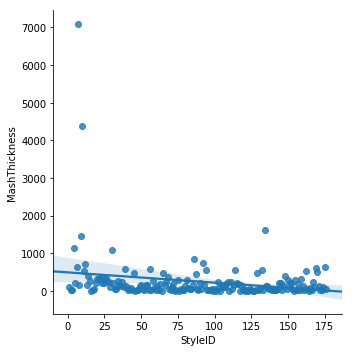

In [42]:
sns.lmplot(x = 'StyleID', y = 'MashThickness', data = beergroup)

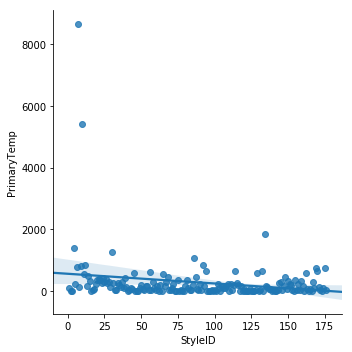

In [43]:
sns.lmplot(x = 'StyleID', y = 'PrimaryTemp', data = beergroup2)

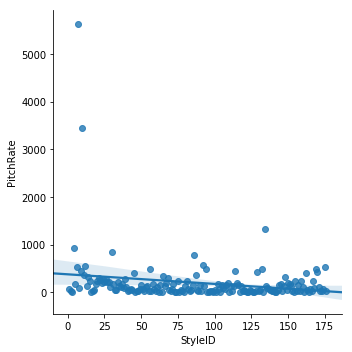

In [44]:
sns.lmplot(x = 'StyleID', y = 'PitchRate', data = beergroup3)

The available values for all of these seem to pretty consistent across styles. These columns could be useful. Let's do a correlation matrix to see if we actually need them.

In [45]:
beer.corr()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp
StyleID,1.000000,-0.006522,0.002699,0.007336,0.006617,-0.141124,0.166669,-0.006301,0.077969,0.002326,0.021515,0.006167,0.079123,-0.019661
Size(L),-0.006522,1.000000,0.162237,0.141614,-0.013527,-0.029917,-0.018068,0.994143,0.044848,0.176071,0.108826,0.019246,0.026623,0.004278
OG,0.002699,0.162237,1.000000,0.936347,0.029432,-0.001655,0.013632,0.165162,0.031825,0.968138,0.067610,0.046841,0.020556,0.000518
FG,0.007336,0.141614,0.936347,1.000000,0.026851,-0.000719,0.029848,0.142974,0.028930,0.908611,0.061173,0.040541,0.013446,0.004477
ABV,0.006617,-0.013527,0.029432,0.026851,1.000000,0.290889,0.271332,-0.009800,0.120629,0.025421,0.047853,-0.069633,0.132699,0.060065
IBU,-0.141124,-0.029917,-0.001655,-0.000719,0.290889,1.000000,0.060283,-0.028258,0.078694,-0.007498,-0.033172,-0.044381,0.006180,0.035510
Color,0.166669,-0.018068,0.013632,0.029848,0.271332,0.060283,1.000000,-0.016798,0.058089,0.013451,-0.017297,-0.038406,0.016061,0.025622
BoilSize,-0.006301,0.994143,0.165162,0.142974,-0.009800,-0.028258,-0.016798,1.000000,0.051219,0.175972,0.121971,0.017772,0.030936,0.003000
BoilTime,0.077969,0.044848,0.031825,0.028930,0.120629,0.078694,0.058089,0.051219,1.000000,0.026921,0.161295,0.006850,0.190922,-0.079809
BoilGravity,0.002326,0.176071,0.968138,0.908611,0.025421,-0.007498,0.013451,0.175972,0.026921,1.000000,0.059132,0.050944,0.016216,0.002268


These 3 columns don't seem to correlated strongly with anything else. I'll keep them.

(0, 10)

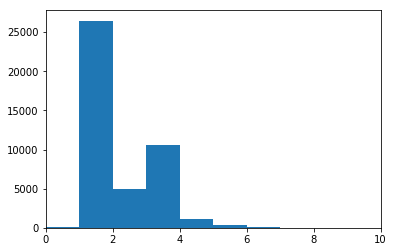

In [46]:
plt.hist(beer2['MashThickness'].dropna(),bins = 100)
plt.xlim(0,10)

{'boxes': [<matplotlib.lines.Line2D at 0x117f84208>],
 'caps': [<matplotlib.lines.Line2D at 0x117f84c18>,
 'fliers': [<matplotlib.lines.Line2D at 0x117f888d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x117f884a8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x117f84358>,
  <matplotlib.lines.Line2D at 0x117f847f0>]}

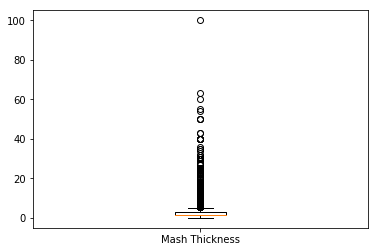

In [47]:
plt.boxplot(beer2['MashThickness'].dropna(), labels = ['Mash Thickness'])

MashThickness has a lot of really high outliers and the distribution is not normal. It probably makes more sense to replace nan values with the median than the mean.

In [48]:
np.median(beer2['MashThickness'].dropna())

1.5

The median for MashThickness is 1.5.

(array([4.4000e+01, 2.0000e+00, 3.0000e+00, 1.5000e+01, 3.5000e+01,
        5.0000e+00, 2.3000e+01, 5.0000e+00, 2.1000e+01, 1.0300e+02,
        2.0120e+03, 1.1590e+03, 2.2540e+03, 1.6954e+04, 2.2760e+04,
        4.5200e+03, 8.6600e+02, 1.3300e+02, 1.0000e+02, 6.0000e+00,
        1.6000e+01, 1.9000e+01, 1.0000e+00, 3.0000e+00, 2.0000e+00,
        6.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 5.0000e+00,
        3.0000e+00, 5.5000e+01, 3.3000e+01, 1.8000e+01, 4.0000e+00,
        4.0000e+00, 0.0000e+00, 5.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([-17.78  , -15.1444, -12.5088,  -9.8732,  -7.2376,  -4.602 ,
         -1.9664,   0.6692,   3.3048,   5.9404,   8.576 ,  11.2116,
         13.8472,  16.4828,  19.1184,  21.754 ,  24.3896,  27.0252,
         29.6608,  32.2964,  34.932 ,  37.5676,  40.2032,  42.8388,
         45.4744,  48.11  ,  50.7456,  53.3812

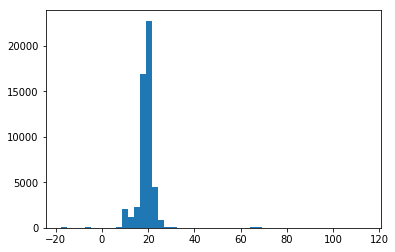

In [49]:
plt.hist(beer2['PrimaryTemp'].dropna(),bins = 50)


{'boxes': [<matplotlib.lines.Line2D at 0x110b0a0b8>],
 'caps': [<matplotlib.lines.Line2D at 0x110b0aac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x110b10780>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x110b10358>],
 'whiskers': [<matplotlib.lines.Line2D at 0x110b0a208>,
  <matplotlib.lines.Line2D at 0x110b0a6a0>]}

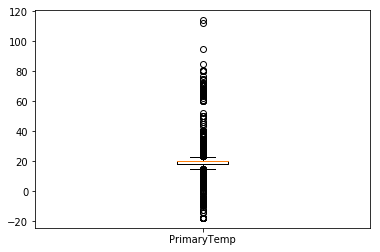

In [50]:
plt.boxplot(beer2['PrimaryTemp'].dropna(), labels = ['PrimaryTemp'])

In [51]:
np.median(beer2['PrimaryTemp'].dropna())

20.0

PrimaryTemp also has a lot of very high outliers. I'll replace nan values with the median.

(array([  51., 9477., 5469., 9002.,    0., 5194., 2405., 1838.,  533.,
         640.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

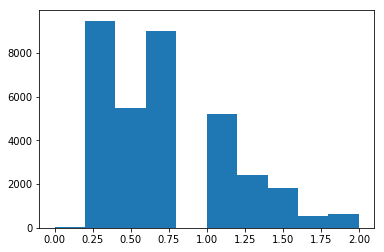

In [52]:
plt.hist(beer2['PitchRate'].dropna())

{'boxes': [<matplotlib.lines.Line2D at 0x116eb8fd0>],
 'caps': [<matplotlib.lines.Line2D at 0x117e43748>,
 'fliers': [<matplotlib.lines.Line2D at 0x117e4da58>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x117e4d898>],
 'whiskers': [<matplotlib.lines.Line2D at 0x116eb8320>,
  <matplotlib.lines.Line2D at 0x117e43128>]}

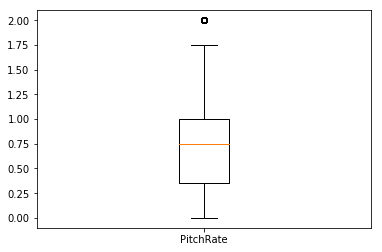

In [53]:
plt.boxplot(beer2['PitchRate'].dropna(), labels = ['PitchRate'])

In [54]:
np.median(beer2['PitchRate'].dropna())


0.75

In [55]:
np.mean(beer2['PitchRate'].dropna())

0.7504680863359242

I could use median or mean for PitchRate to replace the nan values.

In [56]:
beer2['PrimaryTemp2'] = beer2['PrimaryTemp'].fillna(20)

In [57]:
beer2['MashThickness2'] = beer2['MashThickness'].fillna(1.5)

In [58]:
beer2['PitchRate2'] = beer2['PitchRate'].fillna(0.75)

In [59]:
beer2 = beer2.drop(columns = ['MashThickness','PrimaryTemp','PitchRate'])

Finally I can drop all the empty fields from the 'kind' column I created and see how many rows I have left.

In [60]:
beer2.shape

(73861, 17)

In [61]:
beer3 = pd.DataFrame(beer2.dropna(how = 'any',axis = 0))

In [62]:
beer3.shape

(28072, 17)

In [63]:
beer3.tail()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,SugarScale,BrewMethod,kind,PrimaryTemp2,MashThickness2,PitchRate2
BeerID,,,,,,,,,,,,,,,,,
73854,7,18.93,1.073,1.018,7.15,0.00,6.01,22.71,60,1.060,70.0,Specific Gravity,BIAB,IPA,20.0,1.5,0.75
73855,10,18.93,1.064,1.016,6.26,0.00,9.60,28.39,60,1.042,75.0,Specific Gravity,BIAB,Pale Ales,20.0,1.5,0.75
73856,7,22.71,1.065,1.014,6.71,49.35,4.73,15.14,30,1.098,55.0,Specific Gravity,Partial Mash,IPA,20.0,1.5,0.50
73858,151,10.00,1.059,1.010,6.37,59.21,7.90,17.00,60,1.034,60.0,Specific Gravity,BIAB,IPA,22.0,1.5,0.50
73861,7,20.00,1.060,1.010,6.55,57.09,8.65,12.00,60,1.056,70.0,Specific Gravity,Partial Mash,IPA,18.0,1.5,0.75


In [64]:
beer3.corr()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,PrimaryTemp2,MashThickness2,PitchRate2
StyleID,1.000000,0.005168,0.009020,0.004865,0.120725,-0.047212,0.264801,0.006926,0.105271,0.008642,0.041664,0.116934,0.000473,0.040497
Size(L),0.005168,1.000000,0.183932,0.168772,-0.011512,-0.039837,-0.019434,0.995715,0.050269,0.199195,0.112785,0.002632,0.039575,0.018558
OG,0.009020,0.183932,1.000000,0.959977,0.018012,-0.006912,0.014467,0.185270,0.022717,0.967057,0.066160,-0.006564,0.069707,0.005440
FG,0.004865,0.168772,0.959977,1.000000,0.017400,-0.003433,0.015063,0.169366,0.020060,0.927340,0.061966,-0.006599,0.063360,0.003145
ABV,0.120725,-0.011512,0.018012,0.017400,1.000000,0.344002,0.204826,-0.008548,0.119044,0.013341,0.079755,0.000444,-0.056288,0.111201
IBU,-0.047212,-0.039837,-0.006912,-0.003433,0.344002,1.000000,0.098379,-0.038488,0.102872,-0.011651,-0.049344,-0.033093,-0.058588,0.055585
Color,0.264801,-0.019434,0.014467,0.015063,0.204826,0.098379,1.000000,-0.018861,0.026466,0.010294,-0.028084,-0.016767,-0.007314,0.016871
BoilSize,0.006926,0.995715,0.185270,0.169366,-0.008548,-0.038488,-0.018861,1.000000,0.056226,0.198308,0.127395,0.002261,0.040661,0.020410
BoilTime,0.105271,0.050269,0.022717,0.020060,0.119044,0.102872,0.026466,0.056226,1.000000,0.020862,0.162457,0.011932,0.036831,0.081128
BoilGravity,0.008642,0.199195,0.967057,0.927340,0.013341,-0.011651,0.010294,0.198308,0.020862,1.000000,0.054515,-0.003414,0.067106,0.005712


In [65]:
# BoilGravity , OG are very highly correlated with FG.
# BoilSize is too highly correlated with Size(L)
beer3 = pd.DataFrame(beer3.drop(columns = ['OG','BoilGravity','BoilSize']))

In [66]:
beer3.shape

(28072, 14)

In [67]:
beer3dum = pd.get_dummies(beer3.drop(columns = ['kind','StyleID']))

In [68]:
beer3dum.head()

,Size(L),FG,ABV,IBU,Color,BoilTime,Efficiency,PrimaryTemp2,MashThickness2,PitchRate2,SugarScale_Plato,SugarScale_Specific Gravity,BrewMethod_All Grain,BrewMethod_BIAB,BrewMethod_Partial Mash,BrewMethod_extract
BeerID,,,,,,,,,,,,,,,,
6,24.61,1.013,5.58,40.12,8.00,70,79.0,20.00,1.5,1.00,0,1,1,0,0,0
10,20.82,1.017,8.22,93.02,8.29,60,70.0,21.11,1.5,0.75,0,1,1,0,0,0
11,25.00,1.014,6.63,64.26,7.78,90,74.0,18.00,1.5,1.00,0,1,1,0,0,0
14,18.93,1.017,6.51,60.96,10.54,60,30.0,18.33,1.5,0.35,0,1,0,0,0,1
15,37.85,1.017,6.20,64.67,3.91,60,70.0,20.00,1.2,0.75,0,1,1,0,0,0


In [69]:
beer3dum.corr()

,Size(L),FG,ABV,IBU,Color,BoilTime,Efficiency,PrimaryTemp2,MashThickness2,PitchRate2,SugarScale_Plato,SugarScale_Specific Gravity,BrewMethod_All Grain,BrewMethod_BIAB,BrewMethod_Partial Mash,BrewMethod_extract
Size(L),1.000000,0.168772,-0.011512,-0.039837,-0.019434,0.050269,0.112785,0.002632,0.039575,0.018558,0.188276,-0.188276,0.092602,-0.061692,-0.026322,-0.047050
FG,0.168772,1.000000,0.017400,-0.003433,0.015063,0.020060,0.061966,-0.006599,0.063360,0.003145,0.930386,-0.930386,0.070869,-0.046256,-0.019447,-0.037602
ABV,-0.011512,0.017400,1.000000,0.344002,0.204826,0.119044,0.079755,0.000444,-0.056288,0.111201,-0.009853,0.009853,0.031777,-0.022904,-0.001224,-0.019060
IBU,-0.039837,-0.003433,0.344002,1.000000,0.098379,0.102872,-0.049344,-0.033093,-0.058588,0.055585,-0.018561,0.018561,-0.015529,-0.017335,0.012782,0.035728
Color,-0.019434,0.015063,0.204826,0.098379,1.000000,0.026466,-0.028084,-0.016767,-0.007314,0.016871,0.004125,-0.004125,-0.001126,-0.007564,0.022100,-0.003385
BoilTime,0.050269,0.020060,0.119044,0.102872,0.026466,1.000000,0.162457,0.011932,0.036831,0.081128,0.021155,-0.021155,0.158234,-0.033521,-0.054341,-0.160614
Efficiency,0.112785,0.061966,0.079755,-0.049344,-0.028084,0.162457,1.000000,-0.037294,0.100395,0.081897,0.066107,-0.066107,0.464281,0.100651,-0.112258,-0.740043
PrimaryTemp2,0.002632,-0.006599,0.000444,-0.033093,-0.016767,0.011932,-0.037294,1.000000,0.001455,-0.025740,-0.005797,0.005797,0.005221,-0.030301,0.009094,0.022743
MashThickness2,0.039575,0.063360,-0.056288,-0.058588,-0.007314,0.036831,0.100395,0.001455,1.000000,0.000250,0.074443,-0.074443,0.202455,-0.132718,-0.061174,-0.103136
PitchRate2,0.018558,0.003145,0.111201,0.055585,0.016871,0.081128,0.081897,-0.025740,0.000250,1.000000,0.001328,-0.001328,0.059338,-0.000996,-0.029228,-0.068449


In [70]:
#The Sugarscales are too strongly correlated with FG.
beer3dum = pd.DataFrame(beer3dum.drop(columns = ['SugarScale_Specific Gravity','SugarScale_Plato']))

In [71]:
#beer3dum = pd.DataFrame(beer3dum.drop(columns = ['BrewMethod_All Grain','BrewMethod_BIAB','BrewMethod_Partial Mash','BrewMethod_extract']))

In [72]:
beer3dum.shape

(28072, 14)

In [73]:
exes = beer3dum
columns = exes.columns
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(exes)
scaled_df = pd.DataFrame(scaled_df, columns = columns)
scaled_df.columns


Index(['Size(L)', 'FG', 'ABV', 'IBU', 'Color', 'BoilTime', 'Efficiency',
       'PrimaryTemp2', 'MashThickness2', 'PitchRate2', 'BrewMethod_All Grain',
       'BrewMethod_BIAB', 'BrewMethod_Partial Mash', 'BrewMethod_extract'],
      dtype='object')

In [74]:
beer3['kind'].unique()

array(['Pale Ales', 'IPA'], dtype=object)

In [75]:
y = np.ravel(beer3['kind'])
y = y.astype(str)
X = np.asarray(scaled_df)


In [76]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
lr = LogisticRegression(C = 1e6)


In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20)

##Fit the model.
fit = lr.fit(X_train, Y_train)


In [79]:
# Display.


print('Coefficients') 
print(fit.coef_)
print('Intercepts')
print (fit.intercept_)
pred_y_sklearn = lr.predict(X_test)
pred_y_sklearn = lr.predict(X_train)
print('\n Percentage accuracy')
print('Test',lr.score(X_test, Y_test))
print('Train',lr.score(X_train, Y_train))


Coefficients
[[  -3.05453239   -0.20394747  -41.37946601 -103.30071993   -2.12774194
     1.57081915    1.46041481    5.25994254   -0.79914276   -0.47376698
     0.59483801    0.67647426    0.84990427    1.06502934]]
Intercepts
[3.18624587]

 Percentage accuracy
Test 0.826179875333927
Train 0.8206349913167387


In [80]:
#freq = pd.DataFrame(beerna2['StyleID'].value_counts().reset_index())
#freqcut = pd.DataFrame(freq[freq['StyleID'] > 5])
#freqcut['index'].unique()

In [81]:
#freqcut['index'].nunique()

In [82]:
#beerna2cut = pd.DataFrame(beerna2.loc[beerna2['StyleID'].isin(freqcut['index'].unique())])
#beerna2cut['StyleID'].nunique()

In [83]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score


In [84]:
rfc = ensemble.RandomForestClassifier(n_jobs = -1)
y = np.ravel(beer3['kind'])
X = pd.DataFrame(beer3dum)


In [85]:
cross_val_score(rfc,X,y,cv=5)

array([0.84401709, 0.82098326, 0.82240827, 0.81938012, 0.80228001])

In [86]:
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

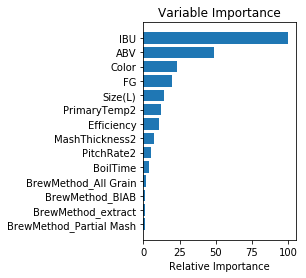

In [87]:

feature_importance = rfc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [88]:
# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [89]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params,subsample=.8)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)



In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, predict_train, normalize=True, sample_weight=None)

0.8501424952501583

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict_test, normalize=True, sample_weight=None)

0.8183760683760684